In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.neighbors import NearestNeighbors


In [2]:
path_train1 = 'tree_diff_circ/train_data_randinit_circ_0_1'
path_idis = "tree_diff_circ/merge_attributes_randinit_circ_0_data_circ.csv"
path_ood  = "tree_diff_circ/merge_attributes_randinit_circ_0_data_circ_ood.csv"

In [3]:
def histogram_plot_log(path):
    odd_0 = pd.read_csv(path)
    odd_0_A = odd_0.drop(['B_volume', 'B_num_training_points','B_pred_logit'], axis =1 )
    odd_0_A['density_A'] = odd_0_A['A_num_training_points']/odd_0_A['A_volume']
    
    odd_0_A['abs_logit_score_A'] = np.absolute(odd_0_A['A_pred_logit'])
    
#     # Plot histograms
#     # Apply log transformation
    odd_0_A['log_density_A'] = np.log(odd_0_A['density_A'] + 1)
    odd_0_A['log_A_num_training_points'] = np.log(odd_0_A['A_num_training_points'] + 1)
    odd_0_A['log_A_volume'] = np.log(odd_0_A['A_volume'] + 1)
    odd_0_A['log_abs_logit_score_A'] = np.log(odd_0_A['abs_logit_score_A'] + 1)
    
    # Define a function to split and convert the space-separated string to a NumPy array
    def convert_string_to_numpy_array(string):
        # Remove brackets and split the string on spaces, then convert to a NumPy array
        return np.array(string.strip('[]').split()).astype(float)
    def load_data(fname='data'):
        loaded = np.load(f'{fname}.npz')
        return loaded['test_x'], loaded['test_y']

    # Apply the conversion function to the entire column
    odd_0_A['point'] = odd_0_A['point'].apply(convert_string_to_numpy_array)
    test_points = np.stack(odd_0_A['point'])
    
    train_points, _ = load_data(path_train1)

    nbrs = NearestNeighbors(n_neighbors=3).fit(train_points)
    distances, indices = nbrs.kneighbors(test_points)

    odd_0_A['dist_knn1'] = distances[:,0]
    odd_0_A['dist_knn2'] = distances[:,1]
    odd_0_A['dist_knn3'] = distances[:,2]


    

#     # Plot histograms
#     fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#     axs[0, 0].hist(odd_0_A['log_density_A'], bins=30, color='b', alpha=0.7)
#     axs[0, 0].set_title('log(density_A)')

#     axs[0, 1].hist(odd_0_A['log_A_num_training_points'], bins=30, color='r', alpha=0.7)
#     axs[0, 1].set_title('log(A_num_training_points)')

#     axs[1, 0].hist(odd_0_A['log_A_volume'], bins=30, color='g', alpha=0.7)
#     axs[1, 0].set_title('log(A_volume)')

#     axs[1, 1].hist(odd_0_A['log_abs_logit_score_A'], bins=30, color='y', alpha=0.7)
#     axs[1, 1].set_title('log(abs_logit_score_A)')

#     plt.tight_layout()
#     plt.show()

    # Plot KDE
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 2, 1)
    sns.kdeplot(odd_0_A['log_density_A'], color='b', shade=True)
    plt.title('log(density_A)')

    plt.subplot(4, 2, 2)
    sns.kdeplot(odd_0_A['log_A_num_training_points'], color='r', shade=True)
    plt.title('log(A_num_training_points)')

    plt.subplot(4, 2, 3)
    sns.kdeplot(odd_0_A['log_A_volume'], color='g', shade=True)
    plt.title('log(A_volume)')

    plt.subplot(4, 2, 4)
    sns.kdeplot(odd_0_A['log_abs_logit_score_A'], color='y', shade=True)
    plt.title('log(abs_logit_score_A)')
    
    plt.subplot(4, 2, 5)
    sns.kdeplot(odd_0_A['dist_knn1'], color='y', shade=True)
    plt.title('dist_knn1')
    
    plt.subplot(4, 2, 6)
    sns.kdeplot(odd_0_A['dist_knn2'], color='y', shade=True)
    plt.title('dist_knn2')
    
    plt.subplot(4, 2, 7)
    sns.kdeplot(odd_0_A['dist_knn3'], color='y', shade=True)
    plt.title('dist_knn3')

    plt.tight_layout()
    plt.show()
    
    return odd_0_A

/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:61: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(odd_0_A['log_density_A'], color='b', shade=True)
/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:65: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(odd_0_A['log_A_num_training_points'], color='r', shade=True)
/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(odd_0_A['log_A_volume'], color='g', shade=True)
/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:73: Futu

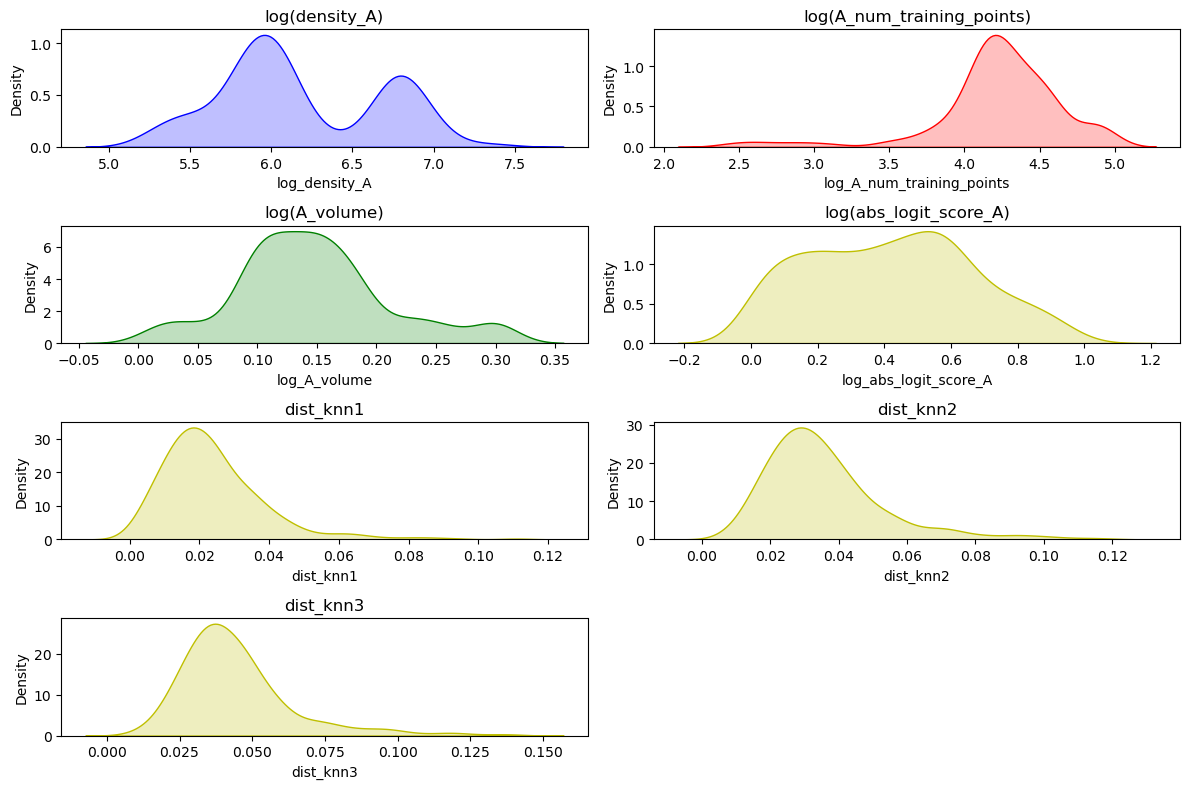

In [4]:
odd_0_A = histogram_plot_log(path_idis)

/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:61: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(odd_0_A['log_density_A'], color='b', shade=True)
/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:65: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(odd_0_A['log_A_num_training_points'], color='r', shade=True)
/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(odd_0_A['log_A_volume'], color='g', shade=True)
/var/folders/wh/_6hqbxsx5_z_8z9zp8cf2k900000gp/T/ipykernel_8129/4117878414.py:73: Futu

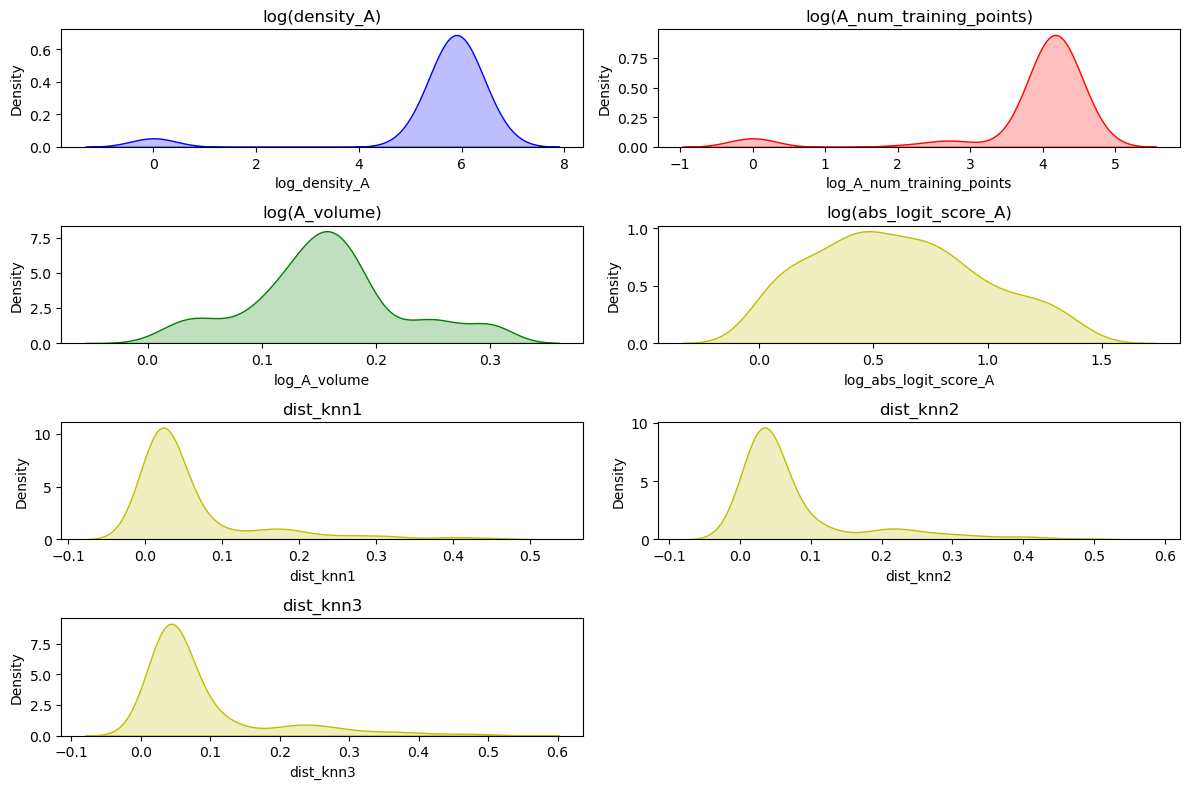

In [5]:
odd_1_A = histogram_plot_log(path_ood)

In [6]:

def calculate_fpr95(tpr, fpr):
    """
    Calculate FPR at 95% TPR.
    """
    idx = np.where(tpr >= 0.95)[0][0]
    return fpr[idx]

def calculate_fpr75(tpr, fpr):
    """
    Calculate FPR at 95% TPR.
    """
    idx = np.where(tpr >= 0.75)[0][0]
    return fpr[idx]


def calculate_metrics(in_dist_logits, ood_logits):
    """
    Calculate TPR and FPR from the logits of in-distribution and OOD samples.
    """
    # Combine in-distribution and OOD logits and labels.
    # Label in-distribution as 1 and OOD as 0
    logits = np.concatenate([in_dist_logits, ood_logits])
    labels = np.concatenate([np.ones_like(in_dist_logits), np.zeros_like(ood_logits)])
    
    # Calculate TPR and FPR
    fpr, tpr, _ = roc_curve(labels, logits)
    
    return tpr, fpr

def plot_roc_curve(tpr, fpr, fpr95):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (FPR95 = {fpr95:.2f})')
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for OOD Detection')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [7]:
# odd_0 = pd.read_csv(path_idis)
# odd_0_A = odd_0.drop(['B_volume', 'B_num_training_points','B_pred_logit'], axis =1 )
# odd_0_A['density_A'] = odd_0_A['A_num_training_points']/odd_0_A['A_volume']
    
# odd_0_A['abs_logit_score_A'] = np.absolute(odd_0_A['A_pred_logit'])

In [8]:

#     odd_1 = pd.read_csv(path_ood)
#     odd_1_A = odd_1.drop(['B_volume', 'B_num_training_points','B_pred_logit'], axis =1 )
#     odd_1_A['density_A'] = odd_1_A['A_num_training_points']/odd_1_A['A_volume']
    
#     odd_1_A['abs_logit_score_A'] = np.absolute(odd_1_A['A_pred_logit'])

In [9]:
# odd_0

In [10]:
# # Define a function to split and convert the space-separated string to a NumPy array
# def convert_string_to_numpy_array(string):
#     # Remove brackets and split the string on spaces, then convert to a NumPy array
#     return np.array(string.strip('[]').split()).astype(float)


# # Apply the conversion function to the entire column
# odd_0['point'] = odd_0['point'].apply(convert_string_to_numpy_array)

In [11]:
# odd_0.point[0]

In [12]:
# np.stack(odd_0.point)

In [13]:
# def load_data(fname='data'):
#     loaded = np.load(f'{fname}.npz')
#     return loaded['test_x'], loaded['test_y']

# train_points, _ = load_data(path_train1)

# test_points = np.stack(odd_0['point'])
# nbrs = NearestNeighbors(n_neighbors=3).fit(train_points)
# distances, indices = nbrs.kneighbors(test_points)


In [14]:
# odd_0['knn1'] = distances[0]
# odd_0['knn2'] = distances[1]
# odd_0['knn3'] = distances[2]

In [15]:
# distances

In [16]:
# distances.shape

0.956140350877193


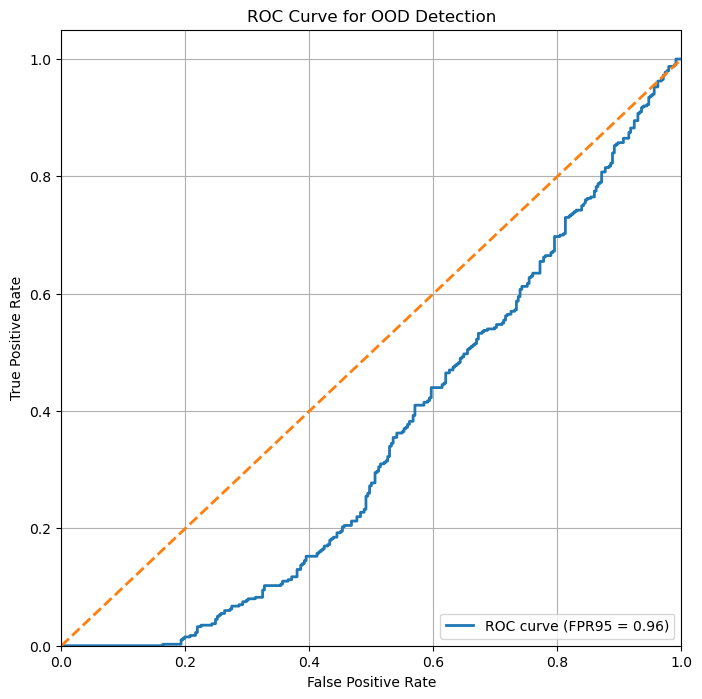

In [17]:
# Example logits for in-distribution and OOD samples
A_pred_logit = odd_0_A['abs_logit_score_A']  # replace with actual logits
B_pred_logit = odd_1_A['abs_logit_score_A']  # replace with actual logits

# Example usage - replace the above logits with actual values for execution
tpr, fpr = calculate_metrics(A_pred_logit, B_pred_logit)
fpr95 = calculate_fpr95(tpr, fpr)

# The fpr95 variable now holds the FPR at 95% TPR. 
print(fpr95)
plot_roc_curve(tpr, fpr, fpr95)

0.868421052631579


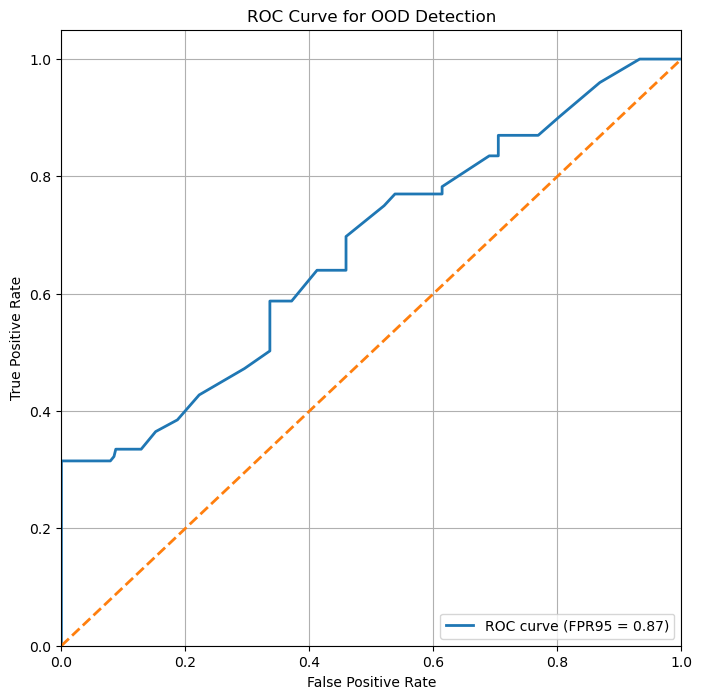

In [18]:
A_den = odd_0_A['density_A']  # replace with actual logits
B_den = odd_1_A['density_A']  # replace with actual logits

# Example usage - replace the above logits with actual values for execution
tpr, fpr = calculate_metrics(A_den, B_den)
fpr95 = calculate_fpr95(tpr, fpr)

print(fpr95)
plot_roc_curve(tpr, fpr, fpr95)

0.8888888888888888


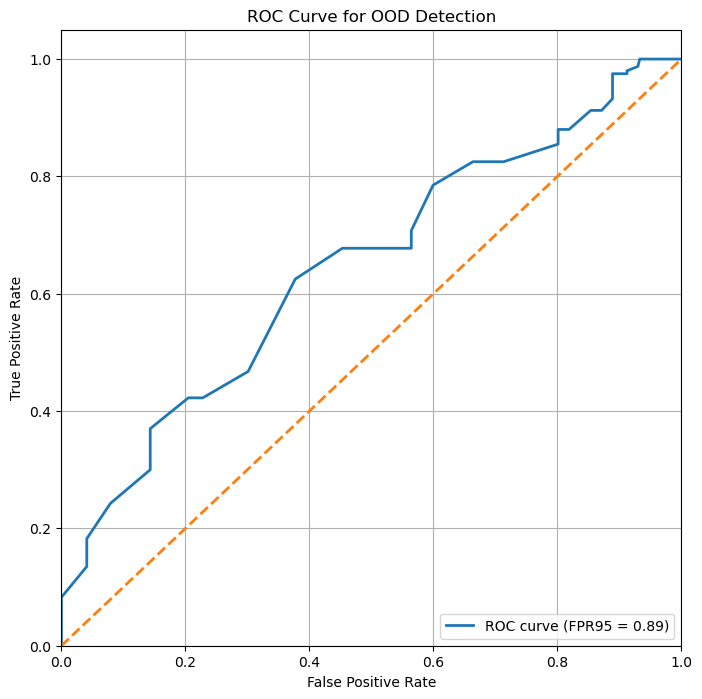

In [19]:
A_point = odd_0_A['A_num_training_points']  # replace with actual logits
B_point = odd_1_A['A_num_training_points']  # replace with actual logits

# Example usage - replace the above logits with actual values for execution
tpr, fpr = calculate_metrics(A_point, B_point)
fpr95 = calculate_fpr95(tpr, fpr)

print(fpr95)
plot_roc_curve(tpr, fpr, fpr95)

0.52046783625731


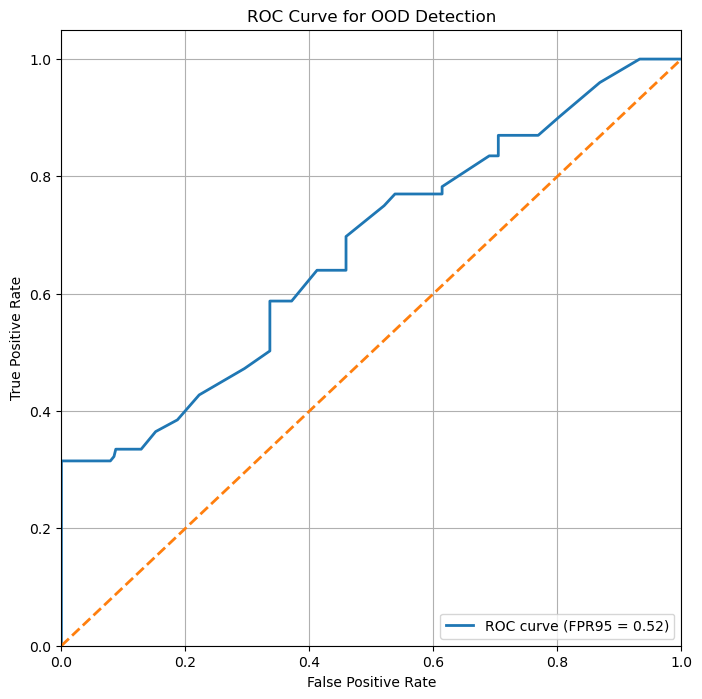

In [20]:
A_den = odd_0_A['density_A']  # replace with actual logits
B_den = odd_1_A['density_A']  # replace with actual logits

# Example usage - replace the above logits with actual values for execution
tpr, fpr = calculate_metrics(A_den, B_den)
fpr75 = calculate_fpr75(tpr, fpr)

print(fpr75)
plot_roc_curve(tpr, fpr, fpr75)

0.8391812865497076


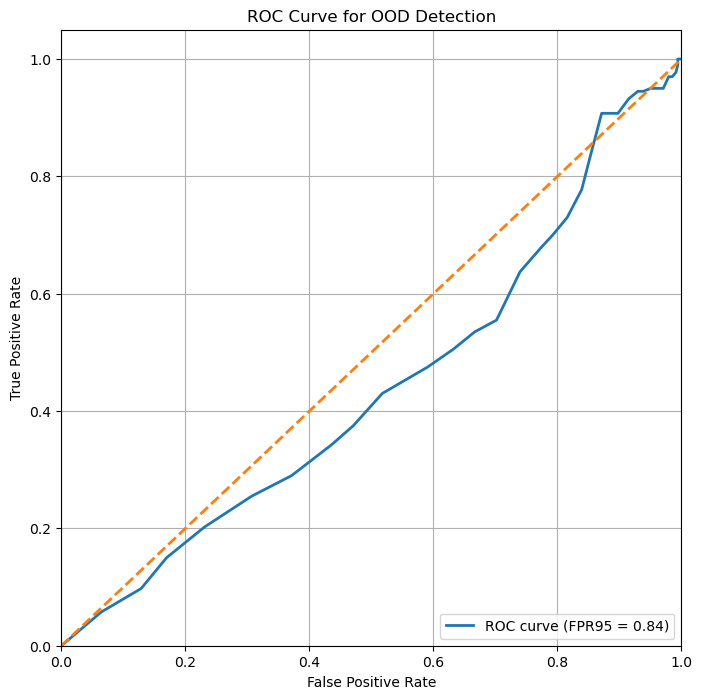

In [21]:
A_vol = odd_0_A['A_volume']  # replace with actual logits
B_vol = odd_1_A['A_volume']  # replace with actual logits

# Example usage - replace the above logits with actual values for execution
tpr, fpr = calculate_metrics(A_vol, B_vol)
fpr75 = calculate_fpr75(tpr, fpr)

print(fpr75)
plot_roc_curve(tpr, fpr, fpr75)

0.5672514619883041


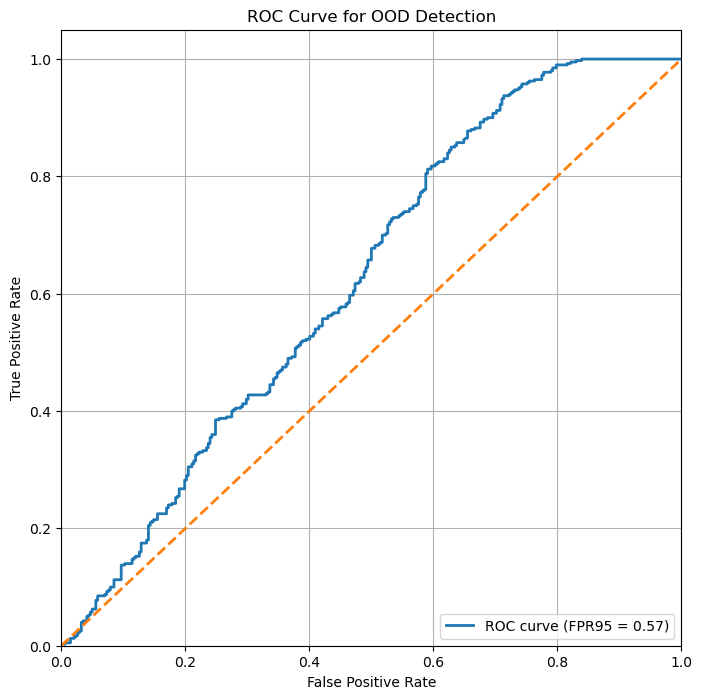

In [23]:
A_knn = -odd_0_A['dist_knn1']  # replace with actual logits
B_knn = -odd_1_A['dist_knn1']  # replace with actual logits

# Example usage - replace the above logits with actual values for execution
tpr, fpr = calculate_metrics(A_knn, B_knn)
fpr75 = calculate_fpr75(tpr, fpr)

print(fpr75)
plot_roc_curve(tpr, fpr, fpr75)